# Juliaで動かす金融計算-Juliaの書き方①

ここからは, 今回扱う`Julia`の基本的な使い方を紹介します.  
ここで紹介することを押さえておけば, 本講座については最低限付いていける...かもしれません.  
なんとなく, `Python`や`MATLAB`を書いたことがある人は馴染みが早い部分があるかもしれませんが, 別に触れたことなくても大丈夫です.  
コードを書くために, ソースファイル`HowToWriteJulia_1.jl`を作っておきましょう.  

（参考）  
ここで紹介する基本的な言語仕様については, [公式資料](https://docs.julialang.org/en/v1/)も併せて確認されると, 理解が深まるかもしれません.

## Hello World!


まずは定番の`Hello World!`という文字列の出力からやっていきましょう.  
と言いつつも, 実は環境構築編で既に動作確認のために書いたプログラムがそれです.
`println()`で中に書いた文字列を1行として出力します.  


In [1]:
println("Hello World!")

Hello World!


`println()`で中に書いた文字列を1行として出力します.  
改行せずに表示したい場合は`print()`を使ってください.  
また, `Julia`では, 文字列はダブルクォーテーション`""`で囲む必要があります.  
文字列については後程扱いますので, 今は先に進みましょう.

## 四則演算


先ほどは出力の仕方を学びました.  
ここでは, 数値計算の基礎として, 四則演算の仕方を学びましょう.

In [3]:
a = 1 #変数への値の代入はこれでOK
b = 2
println(a + b)
println(a - b)
println(a * b)
println(a / b) #これが0ではなくて0.5になる

3
-1
2
0.5


簡単な四則演算の仕方を紹介しました.  
基本的に, その辺のプログラミング言語と大して変わらないと思いますが, 1点だけ補足しておきます.  
それは整数同士の割り算の結果が勝手に実数型になるところです.  
`Julia`では, 数値計算時に, この辺はよしなに判断してやってくれます.  
プログラミング言語によっては, 整数同士の割り算の結果が整数になることもあるので注意してください.  
また, 変数を使うときに, 型を宣言しなくていいのも`Julia`の特徴の一つです.

## 型について


先ほど, `Julia`では変数の型をわざわざ宣言しなくていいと述べました.  
では, `Julia`に型は無いのかといわれると, そうではありません.  
`Julia`では, 整数を表す`Int`型や, 実数を表す`Real`型, 文字列を表す`String`型...等様々な型があります.  
また`C#`等の`object`型に相当するものは, `Any`です.
型の間の変換, キャストについて知っておきましょう.

（余談）  
数学がわかる人向けに紹介しますが, `Julia`には有理数を表す型, 複素数を表す型もあります. 

In [11]:
str_a = "1"
int_a = parse(Int, str_a) #文字列⇒整数はparse(Int, )を使う
println(int_a, ":" ,typeof(int_a))

int_b = 2
str_b = string(int_b) #数値⇒文字列はstring()を使う
println(str_b, ":", typeof(str_b))

1:Int64
2:String


`typeof()`という関数を使うことで, 変数の型を調べることができます.  
デバッグなどの際に役立つので知っておくといいかもしれません.

## 変数に使える文字


`Julia`はUTF-8が使えます.  
また, ユニコードに完全に対応しているらしいです.  
つまり, 変数名にギリシャ文字（`α`や`β`など）が使えます.  
ちょっとこれらを見てみましょう.  

In [6]:
α = 0.01 #/alphaと打ってTabキーを押すとαが出せる
σ = 0.2 #これは\sigmaと打ってTabキー

println(α ≤ σ) #\leqと打ってTabキーで≤が出せる

true


ほかにも色々な記号が使えますが, 具体的に何が使えるかは自分で調べてみてください.

## 配列


`Julia`にも他の言語と同じように配列があります.  
その使い方を簡単に見ておきましょう.

In [2]:
arr = [] #これで配列が初期化されます.
push!(arr, 1) #配列の末尾に要素を追加
pushfirst!(arr, 2) #配列の先頭に要素を追加
println(arr)

first = arr[1] #Juliaの配列のインデックスは1始まり
println(first)

final = arr[end]#実はendとすると配列の最後の要素が取り出せる
println(final)

z = zeros(5) #要素が0.0で長さ5の配列を生成

Any[2, 1]
2
1


5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

配列に要素を追加するには`push!()`という関数を使います.  
`push!()`では末尾に要素が追加されるのですが, `pushfirst!()`では先頭に要素が追加されます.  
配列の初期化については, `arr = []`以外にも方法が用意されていて, 例えば`zeros(n)`とすると, 要素が全て`0.0`で長さ`n`の配列が得られます.  
ここが`Julia`の特徴ですが, **配列のインデックスは1始まり**です.  

なお, 配列を`println()`で表示したときに`Any[]`と表示されますが, この`Any`は配列要素の型を表しています.  
つまり, 上のコード中の`arr`は配列要素の型が具体的に指定されていない状態です.  
具体的に型を指定したい場合は`arr = Int[]`のように宣言します.  

## for文


制御構文の1つである`for`文の書き方を見ておきましょう.  
`for`文を使うことで, 繰り返し処理の記述が可能になります.  
`for`文の繰り返し範囲の指定にはイテレータを記述する`1:5`や配列が使えます.  
具体的に使い方を見てましょう.

In [30]:
println("1から3まで数を表示")
for i in 1:3
    println(i)
end

println("1から5まで間隔2で表示")
for i in 1:2:5
    println(i)
end

arr = [1 , 2 , 4] #配列はこうやっても作れる
println("配列の要素を表示")
for a in arr
    println(a)
end

1から3まで数を表示
1
2
3
1から5まで間隔2で表示
1
3
5
配列の要素を表示


1
2
4


`for`文の後ろには必ず`end`を付けます.  
`C#`とは異なり, 繰り返し範囲の指定に配列を用いる時でも`foreach`ではなく`for`でOKです.

### 内包表記

`Python`等と同じように, 実は以下のようにして配列の作成が可能です.
```  Julia
    arr = [i for i in 1:10] #1から10までの要素を持つ配列を作る
```  
この`[]`の中に繰り返し分を書く記法を内包表記といいます.  
`Python`を少し触ったことがある人は, 「`Python`の配列は内包表記のほうが`for`文より速い」という説明を聴いたことがあるかもしれません.  
**`Julia`では逆に, 内包表記は速度低下を招くことがあるので, 基本的には`for`文のほうが速い**です.  
とはいえ, まぁ便利な書き方ではあるので, 覚えておいて損はないかもしれません.

## if文



次は, 条件分岐のための`if`文を見ていきましょう.

In [31]:
a = 1
b = 2

if a == 1
    println("aは1です")
end

if b == 1
    println("bは1です")
elseif  b == 1
    println("bは2です")
else
    println("bは1, 2以外です")
end


aは1です
bは1, 2以外です


`if`文も, `for`文同様に最後に`end`をつける必要があります.  
`if ～ elseif ～ else`もサポートされています.  
条件判定に使える論理式ですが, 他の言語とそこまで変わりはありません.  
`&&` や `||`が使えます.

## 関数



`Julia`では, 他のプログラミング言語と同様に自分で関数を定義することができます.  
また, ラムダ式もサポートされています.

In [51]:
#自分で関数を定義
function AddNumber(a, b)
    return a + b
end

#関数を呼び出す
c = AddNumber(2 , 5)
println(c)

#ラムダ式
f = () -> println("ラムダ式的な書き方もできるよ")
f()

#begin endを使って複雑なラムダ式も生成可能
f_lambda = () -> begin
    a = 2
    b = 3
    return a * b
end

println(f_lambda())

7
ラムダ式的な書き方もできるよ
6


もう少しだけ, 関数について補足しておきましょう.  
`Julia`においては, 関数というのは引数のタプルを受け取って値を返す**オブジェクト**です.  
つまり, ざっくり言うと`Julia`では, 関数はほかの変数などと同じように, 別の関数の引数や戻り値として扱うことができます.  
（ちなみに, 関数を引数に取ったり, 関数を戻り値にする関数のことを高階関数と呼びます.）

In [57]:
function f1(a, b)
    return a + b
end

function f2(a, b)
    return a - b
end

#関数を引数にとる関数
function g(f, a, b)
    return f(a, b)
end

println(g(f1, 2, 3))
println(g(f2, 2, 3))

#当然ラムダ式でも可
println(g((a, b) -> a * b, 2, 3))

#関数を戻り値にする関数
function make_function()
    f = (a, b) -> a / b
    return f
end

f = make_function()
println(g(f, 2, 3))

5
-1
6
0.6666666666666666


最後に, `Julia`におけるちょっとしたtipsを紹介します.  
`Julia`はグローバル変数を使ってしまうと, 処理が遅くなってしまうことが知られています([公式のPerformance Tips](https://docs.julialang.org/en/v1/manual/performance-tips/)).  
単にソースに「直に」変数などを書いてしまうと, それらはグローバル変数だと解釈されて, 処理速度低下の原因になります.  
それを避けるために, **`main()`関数の中に処理を書いて, `main()`関数を実行するというスタイル**が推奨されています.([参考](https://bkamins.github.io/julialang/2022/07/15/main.html))

``` Julia
function main()
    #ここに処理を書く
end

main()
```

## パッケージの使い方


`Julia`では, 有志が作った様々なパッケージが存在します.  
そのパッケージの入れ方とその簡単な使い方を説明します.  

### パッケージのダウンロード方法


1. デスクトップアイコンをクリックして`Julia`のプロンプト画面を起動する.
1. `]`キーを押す.(これでパッケージモードになる)  
![image.png](attachment:image.png)
1. `add (パッケージ名)`と入力して`Enter`キーを押す.(練習のために, `Distributions`というパッケージをダウンロードしてみましょう.)  
![image-2.png](attachment:image-2.png)
1. ダウンロードが成功したら, `Ctrl + C`か`Backspace`キーでパッケージモードを抜けます.


### パッケージの使い方


早速, 先ほど入れたパッケージを使ってみましょう.  
パッケージを使うには, `using (パッケージ名)`とします.  

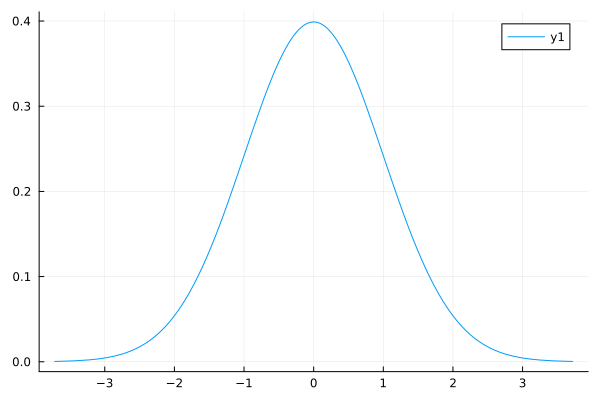

In [63]:
using Distributions #パッケージの利用宣言
using StatsPlots #↑のパッケージにくっついてきてるはず

function main()
    d = Normal(0 , 1) #Distributionsに入っている正規分布の関数を利用
    plot(d) #StatsPlotsに入っている関数を使ってプロット
end

main()

このような形で, 様々なパッケージを使うことができます.

## Juliaの書き方


最後に, 私がなんとなく感じている`Julia`の書き方について, 私見を述べておきます.  
私が普段書いているのは`C#`なのですが, そこでは配列（リスト）に対する要素の追加を以下のように書きます.

``` C#
 var list = new List<int>();
 list.add(1);
```

流れとしては, リストのオブジェクトを作り, **そのオブジェクトの関数（メソッド）を呼び出して**, 値の追加を行います.  
対して, 前述したように`Julia`では, 配列のオブジェクトを作り, **関数でその配列オブジェクトに対して操作して**, 値の追加を行います.  
前者が`list.add(1)`という書き方なら, `Julia`は`push!(list, 1)`というスタイルなのだと思っています.  
つまり, 他のオブジェクト指向な言語では`オブジェクト.関数名(引数)`と書くところを, `Julia`では`関数名(オブジェクト, 引数)`的に書くという感じです.  
これを意識しておくと, `Julia`でパッケージを利用したり, 自分でコードを書くときに, 少し`Julia`らしさが出るのではないかと思っています.